'05_eda.ipynb'

# EDA Exploratory Data Analysis( 탐색적 데이터 분석)


## 주요 내용
0. 가설수립  
1. 데이터 이해: GIGO:쓰레기 인풋은 쓰레기 결과를 부른다
2. 데이터 품질 검사
3. 데이터 시각화
4. 변수간 관계분석
5. 가설 검정 
- 프레임워크란 틀에박힌일 

## EDA 전략 프레임워크 
### 문제 정의와 목적 설정 
- 목적) 우리가 해결하려는 비즈니스 문제는 무엇인가
- 의사결정) 이 분석을 통해 누가, 무엇을 결정하는가
- 성공기준) 분석의 P/F 기준은 무엇인가

### 데이터 이해 단계적 접근 
- 데이터 개요파악
- 변수 분류와 우선순위 설정
- 가설기반 탐색 전략 (~라면 ~일것이다.)
    - 관찰 - X변수의 분포는 어떤 특성이 있을 것 
    - 관계 - X -Y 사이의 특정 관계가 있을 것 
    - 그룹 - A -b 은 특정 변수에서 차이가 있을 것 

# 데이터 품질의 6가지 차원
* 완전성: 결측값이 얼마나 적은가
* 정확성:실제와 얼마나 일치하는지 
* 일관성: 데이터가 모순되지 않는지 ex)주문일보다 도착일이 더 빠른거는 진짜 모순이다. 
* 유효성: 정의된 규칙에 맞는가
* 적시성: 데이터ㅏ 최신인가 
* 유일성: 중복이 없는가


display(boston.head()) ## df 볼때 깔끔하게 보는 방법임
유일 값이 높다는 것은 다다른 데이터일 가능성이 높다는 것이다.


In [53]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

boston = pd.read_csv('./boston-housing.csv', header=None, sep=r'\s+')
boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
display(boston.head())

# 1단계: Boston Housing 데이터 탐색
print("=== Boston Housing 데이터셋 개요 ===")
print(f"데이터 크기: {boston.shape}")
print(f"변수 설명:")

# 변수 설명 딕셔너리
feature_descriptions = {
    'CRIM': '지역별 1인당 범죄율',
    'ZN': '25,000 sq.ft. 이상 주거지역 비율',
    'INDUS': '비소매업 지역 비율', 
    'CHAS': '찰스강 인접 여부 (1: 인접, 0: 비인접)',
    'NOX': '일산화질소 농도 (ppm)',
    'RM': '주택당 평균 방 개수',
    'AGE': '1940년 이전 건축 주택 비율',
    'DIS': '보스턴 고용센터까지 가중거리',
    'RAD': '방사형 고속도로 접근성 지수',
    'TAX': '재산세율',
    'PTRATIO': '학생-교사 비율',
    'B': '흑인 거주 비율 관련 지수',
    'LSTAT': '하위계층 비율',
    'PRICE': '주택 중간값 (단위: $1000)'
}

for var, desc in feature_descriptions.items():
    print(f"  {var}: {desc}")

print(f"\n기본 정보:")
print(boston.info())

df = pd.read_csv('/Users/gim-yujin/Desktop/TIL/데이터분석 /boston-housing.csv', header =None, sep=r'\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


=== Boston Housing 데이터셋 개요 ===
데이터 크기: (506, 14)
변수 설명:
  CRIM: 지역별 1인당 범죄율
  ZN: 25,000 sq.ft. 이상 주거지역 비율
  INDUS: 비소매업 지역 비율
  CHAS: 찰스강 인접 여부 (1: 인접, 0: 비인접)
  NOX: 일산화질소 농도 (ppm)
  RM: 주택당 평균 방 개수
  AGE: 1940년 이전 건축 주택 비율
  DIS: 보스턴 고용센터까지 가중거리
  RAD: 방사형 고속도로 접근성 지수
  TAX: 재산세율
  PTRATIO: 학생-교사 비율
  B: 흑인 거주 비율 관련 지수
  LSTAT: 하위계층 비율
  PRICE: 주택 중간값 (단위: $1000)

기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-nu

In [54]:
def get_data_profile(df: pd.DataFrame, target_col=None):
    """종합적인 데이터 프로파일링 함수"""

    print('=' * 50)
    print('종합 데이터 품질 리포트')
    print('=' * 50)

    # 1. 기본 통계
    print(f'\n1. 기본정보')
    print(f'- 데이터 크기: {df.shape[0]}행 x {df.shape[1]}열')
    print(f'- 메모리 사용량: {df.memory_usage(deep=True).sum()/1024**2:.2f}mb')
    print(f'- 수치형 변수: {len(df.select_dtypes(include=['number']).columns)}개')
    print(f'- 범주형 변수: {len(df.select_dtypes(include=['object']).columns)}개')

    # 2. 결측값 분석
    print(f'\n2. 결측값 분석')
    missing_info = df.isnull().sum()
    m_pct = (missing_info / len(df)) * 100
    if missing_info.sum() == 0:
        print('✅ 결측값 없음. 완전')
    else:
        print('⚠️')
        missing_sum = pd.DataFrame({
            '결축수': missing_info,
            '결측율(%)': m_pct,
        }).round(2)
        missing_sum = missing_sum[missing_sum['결측수'] > 0]
        display(missing_sum)

    # 3. 데이터 타입별 분석
    print(f'\n3. 수치형 변수 품질 분석')
    num_cols = df.select_dtypes(include=['number']).columns
    
    quality_report = []
    for col in num_cols:
        col_data = df[col].dropna()
        # 기본 통계
        stats = {
            '변수명': col,
            '평균': col_data.mean(),
            '표준편차': col_data.std(),
            '최솟값': col_data.min(),
            '최댓값': col_data.max(),
            '왜도': col_data.skew(),
            '첨도': col_data.kurtosis(),
        }

        # 이상값 비율 (IQR)
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        mask = (col_data < Q1 - 1.5 * IQR) | (col_data > Q3 + 1.5 * IQR)
        outliers = col_data[mask]
        stats['이상값비율(%)'] = (len(outliers) / len(col_data)) * 100

        # 유일값 비율
        stats['유일값비율(%)'] = (col_data.nunique() / len(col_data)) * 100

        quality_report.append(stats)
    
    quality_df = pd.DataFrame(quality_report).round(3)
    display(quality_df)

    # 4. 분포 이상 감지
    print(f'\n4. 분포 이상 감지')
    print(f'\n- 극심한 왜도 (|skewness|>2)')
    high_skews = quality_df[abs(quality_df['왜도']) > 2]['변수명'].to_list()
    
    if high_skews:  # high_skews 리스트가 값이 있으면,
        print('⚠️')
        for var in high_skews:
            skew_val = quality_df[quality_df['변수명'] == var].iloc[0]['왜도']
            print(f'-- {var}: 왜도 = {skew_val:.3f}')
    else:
        print('-- ✅ 정상 범위 내 분포')

    print('\n- 높은 이상값 비율(>5%)')
    high_outliers = quality_df[quality_df['이상값비율(%)'] > 5]['변수명'].tolist()
    if high_outliers:
        print('⚠️')
        for var in high_outliers:
            outlier_pct = quality_df[quality_df['변수명'] == var].iloc[0]['이상값비율(%)']
            print(f'-- {var}: 이상값 {outlier_pct:.1f}%')
    else:
        print('-- ✅ 이상값 비율 양호')

    return quality_df


get_data_profile(boston)








종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 506행 x 14열
- 메모리 사용량: 0.05mb
- 수치형 변수: 14개
- 범주형 변수: 0개

2. 결측값 분석
✅ 결측값 없음. 완전

3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,CRIM,3.614,8.602,0.006,88.976,5.223,37.131,13.043,99.605
1,ZN,11.364,23.322,0.000,100.000,2.226,4.032,13.439,5.138
2,INDUS,11.137,6.860,0.460,27.740,0.295,-1.234,0.000,15.020
3,CHAS,0.069,0.254,0.000,1.000,3.406,9.638,6.917,0.395
4,NOX,0.555,0.116,0.385,0.871,0.729,-0.065,0.000,16.008
5,RM,6.285,0.703,3.561,8.780,0.404,1.892,5.929,88.142
6,AGE,68.575,28.149,2.900,100.000,-0.599,-0.968,0.000,70.356
7,DIS,3.795,2.106,1.130,12.126,1.012,0.488,0.988,81.423
8,RAD,9.549,8.707,1.000,24.000,1.005,-0.867,0.000,1.779
9,TAX,408.237,168.537,187.000,711.000,0.670,-1.142,0.000,13.043



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
⚠️
-- CRIM: 왜도 = 5.223
-- ZN: 왜도 = 2.226
-- CHAS: 왜도 = 3.406
-- B: 왜도 = -2.890

- 높은 이상값 비율(>5%)
⚠️
-- CRIM: 이상값 13.0%
-- ZN: 이상값 13.4%
-- CHAS: 이상값 6.9%
-- RM: 이상값 5.9%
-- B: 이상값 15.2%
-- PRICE: 이상값 7.9%


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,CRIM,3.614,8.602,0.006,88.976,5.223,37.131,13.043,99.605
1,ZN,11.364,23.322,0.000,100.000,2.226,4.032,13.439,5.138
2,INDUS,11.137,6.860,0.460,27.740,0.295,-1.234,0.000,15.020
3,CHAS,0.069,0.254,0.000,1.000,3.406,9.638,6.917,0.395
4,NOX,0.555,0.116,0.385,0.871,0.729,-0.065,0.000,16.008
5,RM,6.285,0.703,3.561,8.780,0.404,1.892,5.929,88.142
6,AGE,68.575,28.149,2.900,100.000,-0.599,-0.968,0.000,70.356
7,DIS,3.795,2.106,1.130,12.126,1.012,0.488,0.988,81.423
8,RAD,9.549,8.707,1.000,24.000,1.005,-0.867,0.000,1.779
9,TAX,408.237,168.537,187.000,711.000,0.670,-1.142,0.000,13.043


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

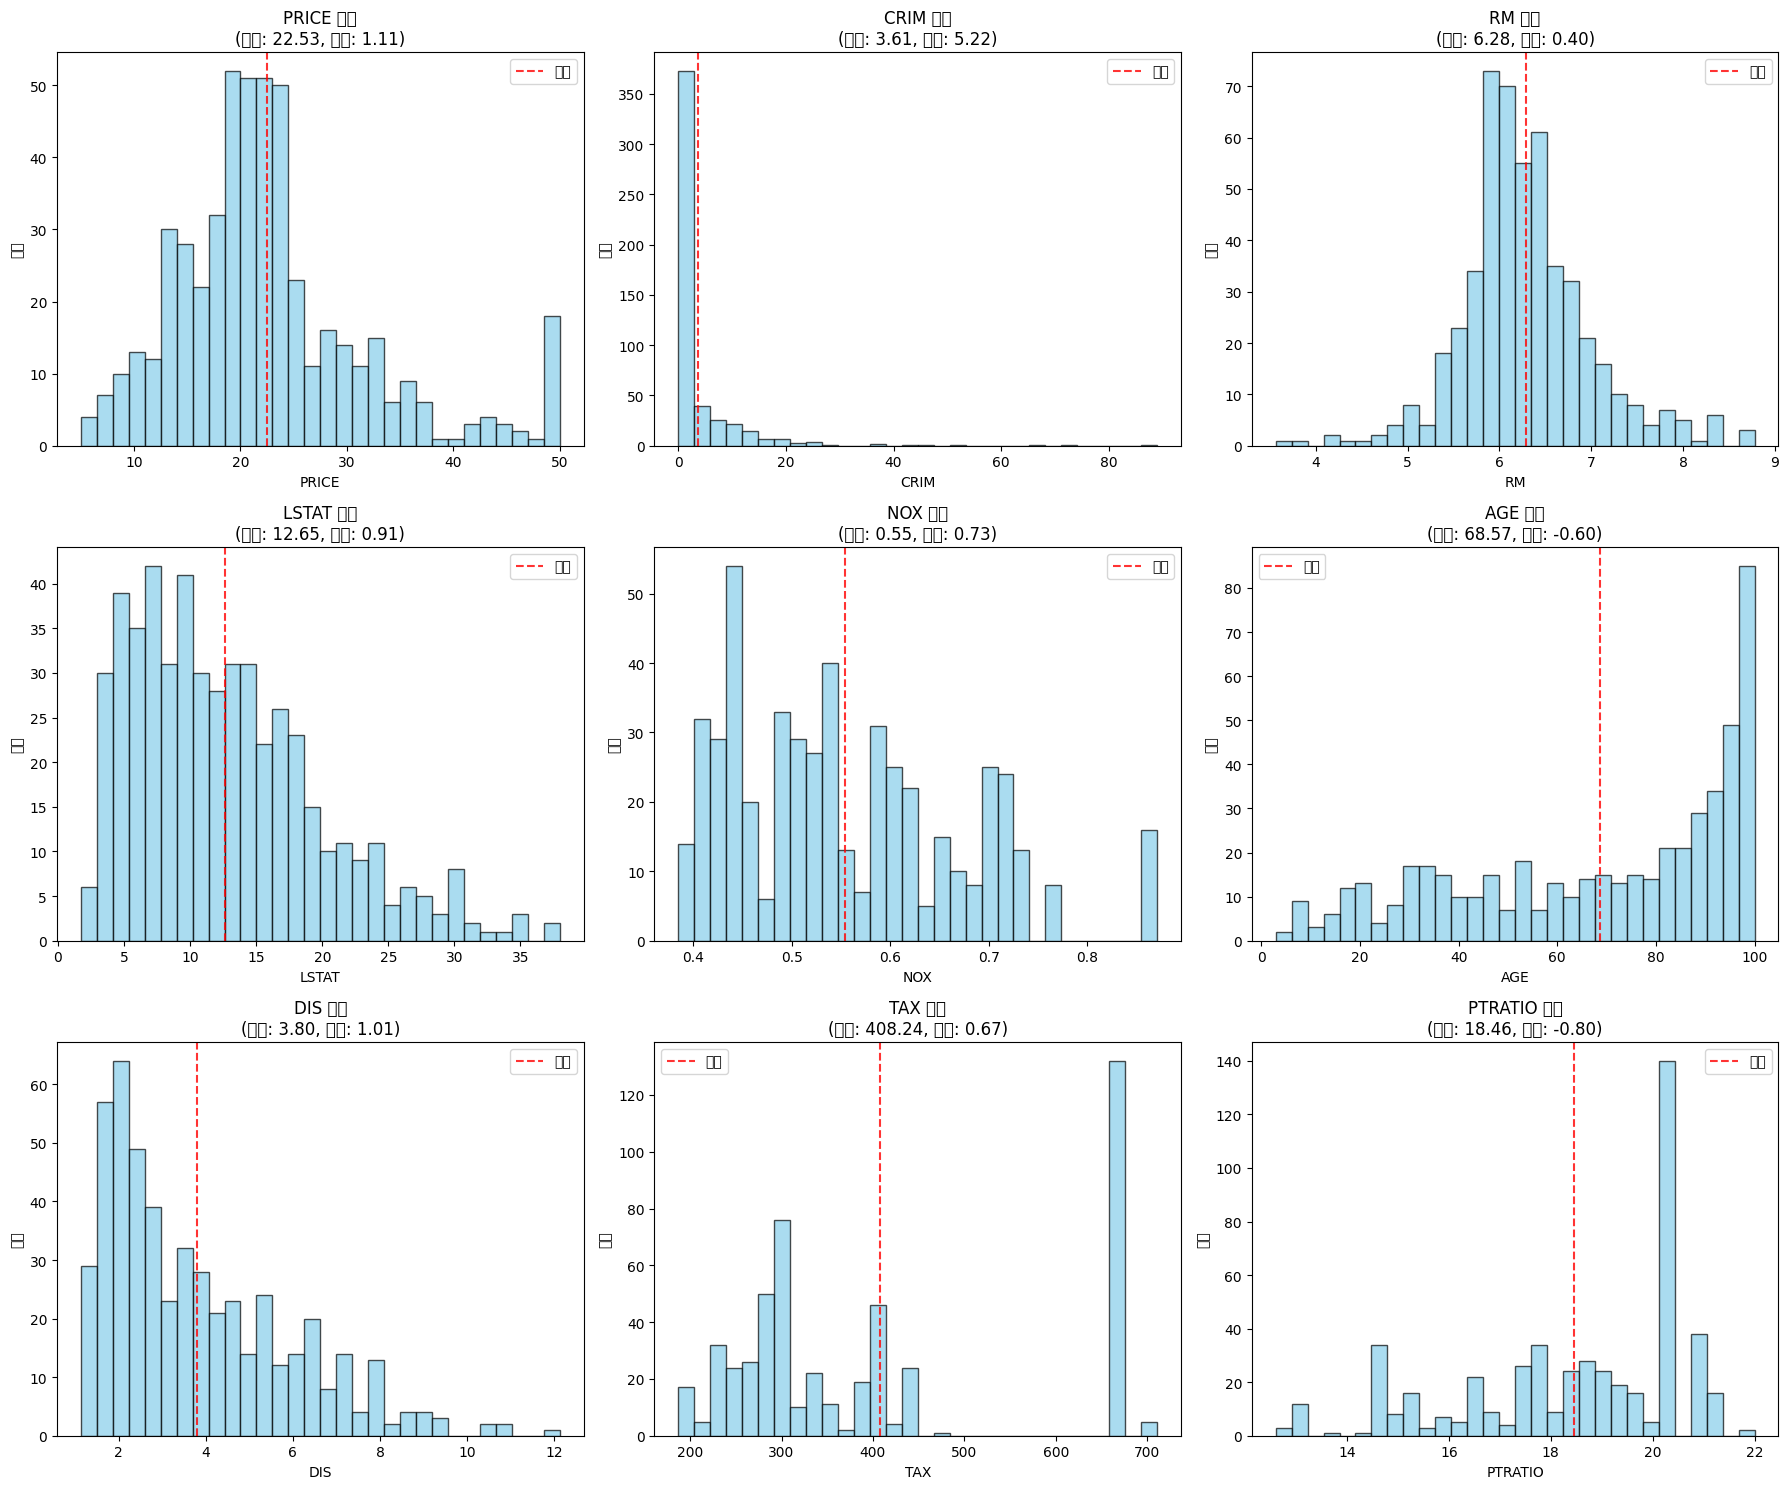

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

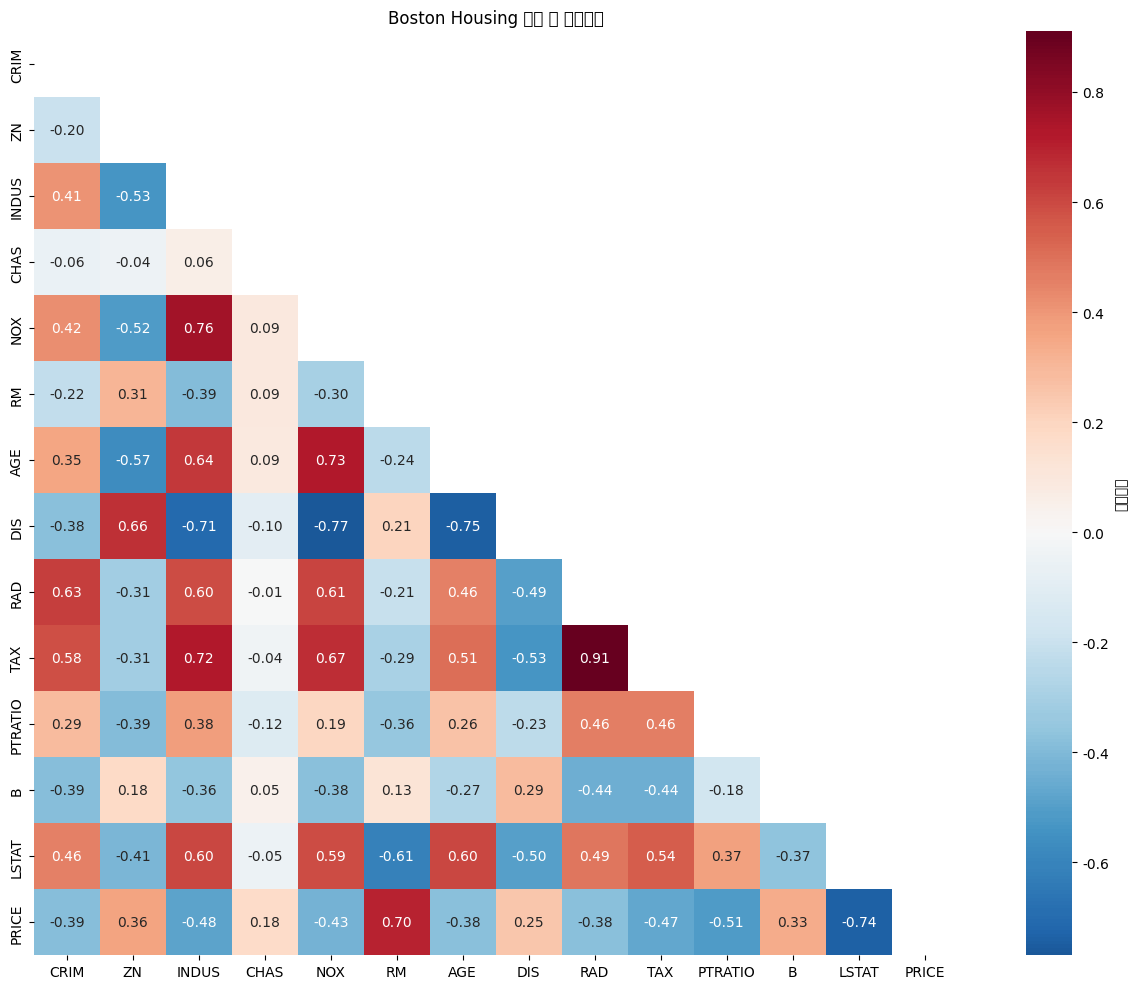

=== 상관관계 분석 결과 ===
PRICE와 상관관계가 높은(>0.5) 변수들:
  LSTAT: 0.738 (음의 상관관계)
  RM: 0.695 (양의 상관관계)
  PTRATIO: 0.508 (음의 상관관계)


In [55]:
# 3단계: 시각적 품질 진단
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# 주요 변수들의 분포 시각화
key_vars = ['PRICE', 'CRIM', 'RM', 'LSTAT', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO']

for i, var in enumerate(key_vars):
    if i < len(axes):
        # 히스토그램과 박스플롯 조합
        ax = axes[i]
        
        # 히스토그램
        ax.hist(boston[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title(f'{var} 분포\n(평균: {boston[var].mean():.2f}, 왜도: {boston[var].skew():.2f})')
        ax.set_xlabel(var)
        ax.set_ylabel('빈도')
        
        # 평균선 표시
        ax.axvline(boston[var].mean(), color='red', linestyle='--', alpha=0.8, label='평균')
        ax.legend()

plt.tight_layout()
plt.show()

# 상관관계 히트맵으로 품질 검증
plt.figure(figsize=(14, 10))
correlation_matrix = boston.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            center=0, cmap='RdBu_r', square=True, cbar_kws={'label': '상관계수'})
plt.title('Boston Housing 변수 간 상관관계')
plt.tight_layout()
plt.show()

print("=== 상관관계 분석 결과 ===")
price_corr = correlation_matrix['PRICE'].abs().sort_values(ascending=False)
print("PRICE와 상관관계가 높은(>0.5) 변수들:")
for var, corr in price_corr.items():
    if var != 'PRICE' and corr > 0.5:
        print(f"  {var}: {corr:.3f} ({'양의 상관관계' if correlation_matrix['PRICE'][var] > 0 else '음의 상관관계'})")





 


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# 온라인 소매 데이터 생성 (컬럼명 소문자 버전)
np.random.seed(42)
n_customers = 1000

def create_realistic_ecommerce_data(n=1000):
    """실제와 유사한 전자상거래 데이터 생성 (소문자 컬럼명)"""
    
    data = {}
    
    # 고객 기본 정보
    data['customer_id'] = range(1, n+1)
    data['age'] = np.random.normal(35, 12, n).clip(18, 80).astype(int)
    data['gender'] = np.random.choice(['M', 'F'], n, p=[0.45, 0.55])
    data['city'] = np.random.choice(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju'], 
                                   n, p=[0.4, 0.2, 0.15, 0.15, 0.1])
    
    # 구매 행동 데이터
    data['total_purchases'] = np.random.poisson(8, n) + 1
    data['avg_order_value'] = np.random.lognormal(4.5, 0.8, n).round(2)
    data['days_since_last_purchase'] = np.random.exponential(30, n).astype(int)
    
    # 만족도 및 충성도
    data['satisfaction_score'] = np.random.normal(3.8, 1.2, n).clip(1, 5).round(1)
    data['loyalty_points'] = (data['total_purchases'] * data['avg_order_value'] * 0.1 + 
                             np.random.normal(0, 100, n)).clip(0, None).round(0)
    
    # 카테고리별 구매 금액
    categories = ['electronics', 'clothing', 'books', 'home', 'sports']
    for cat in categories:
        # 일부 고객은 특정 카테고리에서 구매하지 않음
        values = np.random.lognormal(3, 1, n)
        # 30% 확률로 해당 카테고리 구매 안 함 (0으로 설정)
        mask = np.random.random(n) < 0.3
        values[mask] = 0
        data[f'{cat}_spending'] = values.round(2)
    
    df = pd.DataFrame(data)
    
    # 의도적 결측값 생성 (실제 상황 모방)
    
    # 1. MCAR: 완전 무작위 결측 (시스템 오류)
    missing_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
    df.loc[missing_indices, 'satisfaction_score'] = np.nan
    
    # 2. MAR: 조건부 결측 (나이가 높을수록 만족도 응답 거부율 증가)
    elderly_mask = df['age'] > 50
    elderly_missing = np.random.random(elderly_mask.sum()) < 0.15  
    elderly_indices = df[elderly_mask].index[elderly_missing]
    df.loc[elderly_indices, 'satisfaction_score'] = np.nan
    
    # 3. MNAR: 결측 자체가 의미 (높은 소득자들이 개인정보 비공개)
    high_spenders = df['avg_order_value'] > df['avg_order_value'].quantile(0.8)
    high_spender_missing = np.random.random(high_spenders.sum()) < 0.25
    high_spender_indices = df[high_spenders].index[high_spender_missing]
    df.loc[high_spender_indices, 'age'] = np.nan
    
    # 도시 정보 일부 결측 (배송지 미입력)
    city_missing = np.random.choice(df.index, size=int(0.08 * len(df)), replace=False)
    df.loc[city_missing, 'city'] = np.nan
    
    # 의도적 이상값 생성
    
    # 1. 데이터 입력 오류 (나이 999살)
    error_indices = np.random.choice(df.index, size=3, replace=False)
    df.loc[error_indices, 'age'] = 999
    
    # 2. 비즈니스 이상값 (VIP 고객의 극도로 높은 구매액)
    vip_indices = np.random.choice(df.index, size=5, replace=False)
    df.loc[vip_indices, 'avg_order_value'] *= 20
    df.loc[vip_indices, 'loyalty_points'] *= 10
    
    # 3. 시스템 버그로 인한 음수값
    bug_indices = np.random.choice(df.index, size=2, replace=False) 
    df.loc[bug_indices, 'days_since_last_purchase'] = -1
    
    return df

# 데이터 생성
ecommerce = create_realistic_ecommerce_data(1000)

print("=== 온라인 소매 데이터 개요 ===")
print(f"데이터 크기: {ecommerce.shape}")
print("\n데이터 샘플:")
display(ecommerce.head(10))

print(f"\n기본 정보:")
print(ecommerce.info())

=== 온라인 소매 데이터 개요 ===
데이터 크기: (1000, 14)

데이터 샘플:


,customer_id,age,gender,city,total_purchases,avg_order_value,days_since_last_purchase,satisfaction_score,loyalty_points,electronics_spending,clothing_spending,books_spending,home_spending,sports_spending
0,1,40.0,M,Seoul,9,80.62,8,3.8,86.0,18.44,0.00,10.65,0.00,184.52
1,2,33.0,M,Seoul,9,27.69,4,2.0,0.0,46.54,0.00,210.79,17.13,20.43
2,3,42.0,F,Seoul,5,71.05,58,2.5,0.0,0.00,4.54,0.00,9.48,0.00
3,4,53.0,F,Seoul,11,158.62,24,1.8,318.0,26.55,25.55,3.49,5.04,41.76
4,5,32.0,M,Incheon,14,79.10,59,5.0,228.0,23.31,6.52,6.34,29.39,18.09
5,6,32.0,F,Busan,7,75.49,53,3.2,151.0,48.28,4.30,31.78,0.00,10.51
6,7,53.0,M,Busan,10,92.04,9,5.0,123.0,0.00,19.93,6.88,109.88,0.00
7,8,44.0,F,Seoul,10,95.80,23,1.0,135.0,37.61,23.63,24.12,13.02,0.00
8,9,29.0,F,Gwangju,10,156.80,2,5.0,76.0,24.55,18.20,20.30,3.03,13.65
9,10,41.0,F,Seoul,4,157.57,74,3.7,77.0,0.00,31.13,0.00,0.00,0.00



기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   int64  
 1   age                       944 non-null    float64
 2   gender                    1000 non-null   object 
 3   city                      920 non-null    object 
 4   total_purchases           1000 non-null   int64  
 5   avg_order_value           1000 non-null   float64
 6   days_since_last_purchase  1000 non-null   int64  
 7   satisfaction_score        934 non-null    float64
 8   loyalty_points            1000 non-null   float64
 9   electronics_spending      1000 non-null   float64
 10  clothing_spending         1000 non-null   float64
 11  books_spending            1000 non-null   float64
 12  home_spending             1000 non-null   float64
 13  sports_spending           1000 non-null   float64
dtypes

In [57]:
#데이터 전반적인 상태를 한번에 점검 

from da_utils import profile 	#da_utils 라는 모듈(또는 패키지)에서 profile 이라는 하위 모듈 또는 객체를 불러옴

data_reprot= profile.get_data_profile(ecommerce) # 	•	profile 모듈 안의 get_data_profile() 함수를 실행


종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 1000행 x 14열
- 메모리 사용량: 0.19mb
- 수치형 변수: 12개
- 범주형 변수: 2개

2. 결측값 분석
⚠️


,결측수,결측율(%)
age,56,5.6
city,80,8.0
satisfaction_score,66,6.6



3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,customer_id,500.500,288.819,1.00,1000.00,0.000,-1.200,0.000,100.000
1,age,38.090,55.408,18.00,999.00,16.626,286.612,1.059,5.508
2,total_purchases,8.937,2.630,2.00,17.00,0.227,-0.097,0.000,1.600
3,avg_order_value,128.624,185.100,8.05,3603.40,11.637,196.193,7.000,97.900
4,days_since_last_purchase,29.863,30.656,-1.00,191.00,1.688,3.301,4.800,13.300
5,satisfaction_score,3.673,1.067,1.00,5.00,-0.506,-0.586,0.000,4.390
6,loyalty_points,131.534,158.522,0.00,1640.00,3.606,23.761,3.700,34.300
7,electronics_spending,22.506,35.498,0.00,545.10,5.302,54.688,6.300,67.000
8,clothing_spending,23.553,42.124,0.00,877.86,9.838,175.613,6.200,67.600
9,books_spending,25.777,40.763,0.00,468.20,3.898,23.960,7.100,66.400



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
⚠️
-- age: 왜도 = 16.626
-- avg_order_value: 왜도 = 11.637
-- loyalty_points: 왜도 = 3.606
-- electronics_spending: 왜도 = 5.302
-- clothing_spending: 왜도 = 9.838
-- books_spending: 왜도 = 3.898
-- home_spending: 왜도 = 3.685
-- sports_spending: 왜도 = 9.004

- 높은 이상값 비율(>5%)
⚠️
-- avg_order_value: 이상값 7.0%
-- electronics_spending: 이상값 6.3%
-- clothing_spending: 이상값 6.2%
-- books_spending: 이상값 7.1%
-- home_spending: 이상값 7.6%
-- sports_spending: 이상값 7.4%


=== 결측값 패턴 분석 ===
변수별 결측 현황


,결측수,결측률(%)
city,80,8.0
satisfaction_score,66,6.6
age,56,5.6


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

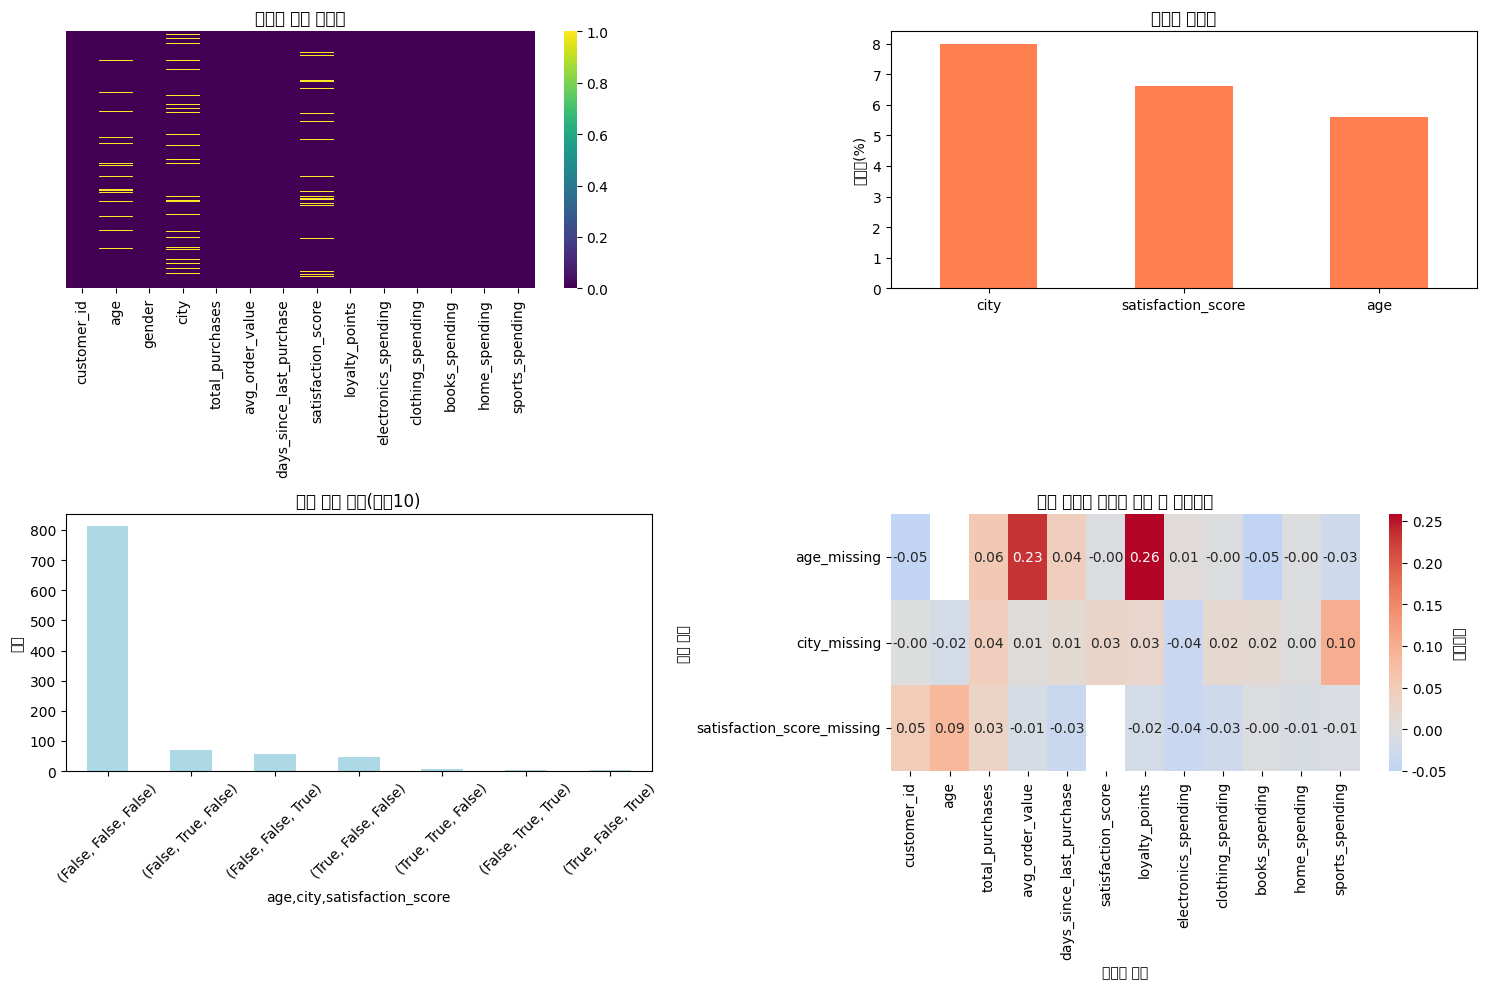

,결측수,결측률(%)
city,80,8.0
satisfaction_score,66,6.6
age,56,5.6


In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


def analyze_missing_patterns(df: pd.DataFrame):
    """결측값 패턴 종합 분석"""
    print('=== 결측값 패턴 분석 ===')
    missing_info = df.isna().sum()
    missing_pct = (missing_info / len(df)) * 100
    missing_summary = pd.DataFrame({
        '결측수': missing_info,
        '결측률(%)': missing_pct.round(2)
    })
    missing_summary = missing_summary[missing_summary['결측수'] > 0].sort_values('결측수', ascending=False)
    print('변수별 결측 현황')
    display(missing_summary)

    # 결측값 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

    # 1. 결측값 히트맵
    sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='viridis', ax=a1)
    a1.set_title('결측값 패턴 히트맵')

    # 2. 변수별 결측률 바 차트
    if len(missing_summary):  # missing_summary 가 비어있지 않으면
        missing_summary['결측률(%)'].plot(kind='bar', color='coral', ax=a2)
        a2.set_title('변수별 결측률')
        a2.set_ylabel('결측률(%)')
        a2.tick_params(axis='x', rotation=0)

    # 3. 결측값 조합 패턴
    missing_pattern = df[df.columns[df.isna().any()]].isna()
    if len(missing_pattern.columns) > 0:  # 수정: len(missing_pattern) -> len(missing_pattern.columns)
        pattern_counts = missing_pattern.value_counts().head(10)
        if len(pattern_counts) > 0:  # pattern_counts가 비어있지 않은 경우에만 플롯
            pattern_counts.plot(kind='bar', color='lightblue', ax=a3)
            a3.set_title('결측 패턴 조합(상위10)')
            a3.set_ylabel('빈도')
            a3.tick_params(axis='x', rotation=45)
        else:
            a3.text(0.5, 0.5, '결측 패턴 없음', ha='center', va='center')
            a3.axis('off')
    else:
        a3.text(0.5, 0.5, '결측값 없음', ha='center', va='center')
        a3.axis('off')


    # 4. 결측 변수별 결측 여부(0/1)와 다른 수치형 변수 간 상관관계 히트맵 시각화
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    missing_cols = df.columns[df.isna().any()].tolist()

    if len(numeric_cols) > 0 and len(missing_cols) > 0:
        # 결측값을 0/1로 변환한 DataFrame 생성
        missing_binary = df[missing_cols].isna().astype(int)
        missing_binary.columns = [f'{col}_missing' for col in missing_binary.columns]
        
        # 수치형 변수와 결측 패턴 변수 결합
        corr_data = pd.concat([df[numeric_cols], missing_binary], axis=1)
        
        # 상관계수 계산
        correlation_matrix = corr_data.corr()
        
        # 결측 패턴 변수와 수치형 변수 간의 상관관계만 추출
        missing_numeric_corr = correlation_matrix.loc[
            missing_binary.columns, 
            numeric_cols
        ]
        
        # 상관관계가 있는 경우에만 히트맵 그리기
        if missing_numeric_corr.shape[0] > 0 and missing_numeric_corr.shape[1] > 0:
            sns.heatmap(missing_numeric_corr, 
                    annot=True, 
                    cmap='coolwarm', 
                    center=0,
                    fmt='.2f',
                    ax=a4,
                    cbar_kws={'label': '상관계수'})
            a4.set_title('결측 패턴과 수치형 변수 간 상관관계')
            a4.set_xlabel('수치형 변수')
            a4.set_ylabel('결측 패턴')
        else:
            a4.text(0.5, 0.5, '분석할 상관관계 없음', ha='center', va='center')
            a4.axis('off')
    else:
        a4.text(0.5, 0.5, '수치형 변수 또는\n결측값이 없음', ha='center', va='center')
        a4.axis('off')

    plt.tight_layout()
    plt.show()

    return missing_summary

# 사용 예시
analyze_missing_patterns(ecommerce)

In [59]:
#결측 메커니즘 진단 
from scipy.stats import chi2_contingency
print('===결측 메커니즘 진단===')

#MAR 패턴
#MAR 패턴 검증 : 나이 결측과 구매액의 관계 
if ecommerce['age'].isnull().sum()>0:
    print('age 결측 메커님즘 분석')

    #구매액 분위별 나이 결측률
    df_temp=ecommerce.copy()
    df_temp['spending_quartile'] = pd.qcut(df_temp['avg_order_value'].dropna(), q=4, labels=['하위25', '하위50', '상위50', '상위25'])
    age_missing_my_spending= df_temp.groupby('spending_quartile')['age'].apply(lambda x:x.isnull().mean()) #각 그룹별로 나이 col 에다가 비어있는 사람들의 비율  
    for key, value in age_missing_my_spending.items():
        print(f'{key}: {value}.1%')

    con_table =  pd.crosstab(df_temp['spending_quartile'], df_temp['age'].isnull())
   
    chi2, p_value,dof,excepted = chi2_contingency(con_table)
    print(f'카이제곱 통계량:{chi2:.3f}, p-value:{p_value:.4f}')
    if p_value <0.05:
        print('MAR 패턴확인: 구매액에 따라 나이 결측률이 유의미하게 다름')
    else:
        print('MCAR: 가능성 있음: 구매액과 나이 결측이 독립적')


    # 만족도 결측 패턴 분석 
    print('\n 만족도(satisfaction_score) 결측 메커니즘 분석')

    #1.연령대별 만족도 결측률 [0,30,50,100] - ['청년층 ~30','중년층 31~50', '장년층 51+']
    # df_temp['age_group'] = pd.qcut(df_temp['avg'].dropna(), q=3, labels = ['청년층','중년층','장년층'])
    # df_temp.groupby('age_group')['age'] 
    #연령대 별 만족도 결측률 
    bins = [0, 30, 50, 100]
    labels=['청년층 ~30','중년층 31~50', '장년층 50 +']

    #연령대 컬럼생성
    ecommerce['age_group'] =pd.cut(ecommerce['age'],bins=bins,labels=labels, right= True)
    
    #연령대별 만족도 결측률 계산 
    satisfaction_missing_by_age = ecommerce.groupby('age_group')['satisfaction_score'].apply(lambda x:x.isnull().mean())
    #결과출력 
    print('연령대별 만족도 결측률:')
    print(satisfaction_missing_by_age)
 
    #2.각 구간마다 만족도가 없는 사람들의 %를 구해서 print 
    print('===연령대별 만족도 결측률=== ')
    for group, percentage in satisfaction_missing_by_age.items(): #items 메서드는  딕셔너리에서 키와 값의 쌍을 튜플 형태로 반환해준다. 
        print(f'{group}: {percentage:.2f}%')
    #3.성별 만족도 결측률 
 #카이제곱으로 뽑아서 보아도 된다. 
else:
    print('Age 결측 없음')


===결측 메커니즘 진단===
age 결측 메커님즘 분석
하위25: 0.0.1%
하위50: 0.0.1%
상위50: 0.0.1%
상위25: 0.224.1%
카이제곱 통계량:177.966, p-value:0.0000
MAR 패턴확인: 구매액에 따라 나이 결측률이 유의미하게 다름

 만족도(satisfaction_score) 결측 메커니즘 분석
연령대별 만족도 결측률:
age_group
청년층 ~30      0.040230
중년층 31~50    0.058000
장년층 50 +     0.204301
Name: satisfaction_score, dtype: float64
===연령대별 만족도 결측률=== 
청년층 ~30: 0.04%
중년층 31~50: 0.06%
장년층 50 +: 0.20%


# 고급 결측값 대체 기법


In [60]:
%pip install -q scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [61]:
# Impute -> 대체하다
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 숫자형 컬럼들
numeric_cols = ['age', 'total_purchases', 'avg_order_value', 
       'days_since_last_purchase', 'satisfaction_score', 'loyalty_points']

df_numeric = ecommerce[numeric_cols]
print('원본 데이터 결측률')
for col in numeric_cols:
    missing_rate = df_numeric[col].isnull().mean()
    if missing_rate > 0:
        print(f'  {col}: {missing_rate:.2%}')

# 1. 컬럼별 결측을 모두 평균으로 대체
imputer_mean = SimpleImputer(strategy='mean')
df_mean = df_numeric.copy()
df_mean[numeric_cols] = imputer_mean.fit_transform(df_numeric[numeric_cols])

# 2. KNN 대체 -> K-Nearest Neighbors
imputer_knn = KNNImputer(n_neighbors=5)
df_knn = df_numeric.copy()
df_knn[numeric_cols] = imputer_knn.fit_transform(df_numeric[numeric_cols])

# 3. MICE 대체 -> Multiple Imputation by Chained Equations (결측이 있는 변수를 다른 변수들을 이용해 회귀모델 예측)
# 변수간 상관관계가 약한경우 -> 평균으로 도달하게 됨.
imputer_mice = IterativeImputer(random_state=42, max_iter=20)
df_mice = df_numeric.copy()
df_mice[numeric_cols] = imputer_mice.fit_transform(df_numeric[numeric_cols])

원본 데이터 결측률
  age: 5.60%
  satisfaction_score: 6.60%


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

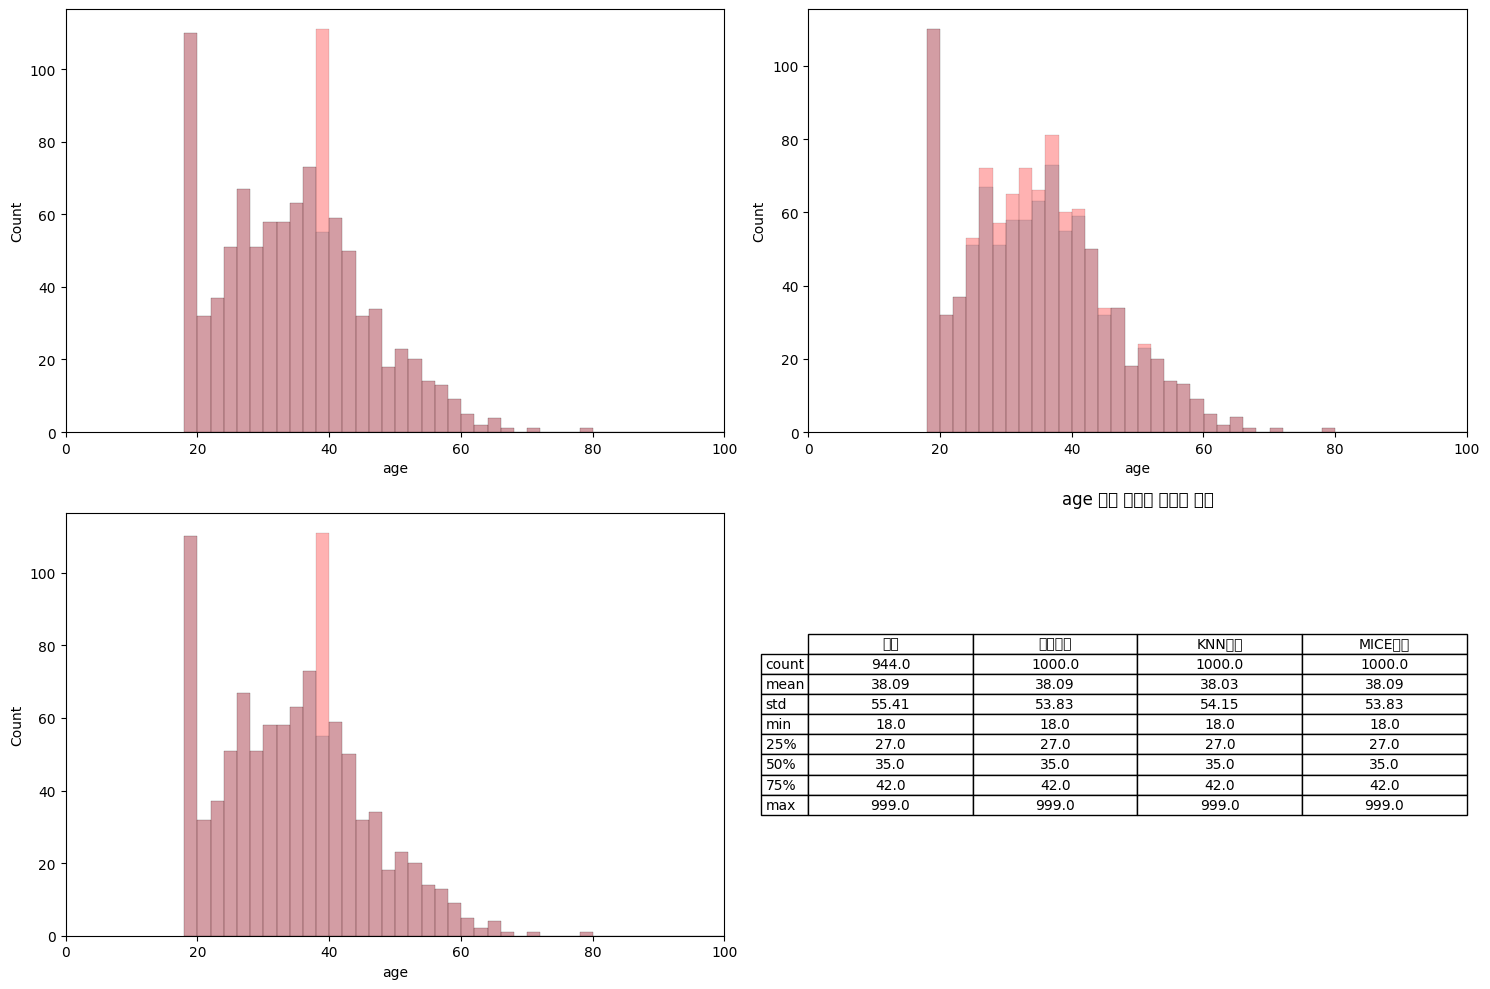

In [62]:
# 대체 결과 비교 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
a1, a2, a3, a4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]

# age 변수 대체 결과
variable = 'age'

if df_numeric[variable].isnull().sum() > 0:
    x_min, x_max = 0, 100
    # 원본-평균대체
    sns.histplot(df_numeric[variable], binwidth=2, kde=False, ax=a1, color='lightblue', label='원본')
    sns.histplot(df_mean[variable], binwidth=2, kde=False, ax=a1, color='red', label='평균대체', alpha=0.3)
    a1.set_xlim(x_min, x_max)
    
    # 원본-KNN대체
    sns.histplot(df_numeric[variable], binwidth=2, kde=False, ax=a2, color='lightblue', label='원본')
    sns.histplot(df_knn[variable], binwidth=2, kde=False, ax=a2, color='red', label='KNN', alpha=0.3)
    a2.set_xlim(x_min, x_max)

    # 원본-MICE대체
    sns.histplot(df_numeric[variable], binwidth=2, kde=False, ax=a3, color='lightblue', label='원본')
    sns.histplot(df_mice[variable], binwidth=2, kde=False, ax=a3, color='red', label='MICE', alpha=0.3)
    a3.set_xlim(x_min, x_max)

    # 대체 전후 통계량 비교
    comparison_stats = pd.DataFrame({
        '원본': df_numeric[variable].describe(),
        '평균대체': df_mean[variable].describe(),
        'KNN대체': df_knn[variable].describe(),
        'MICE대체': df_mice[variable].describe(),
    }).round(2)
    
    # 텍스트로 통계 비교 표시
    a4.axis('off')
    a4.table(
        cellText=comparison_stats.values,
        rowLabels=comparison_stats.index,
        colLabels=comparison_stats.columns,
        cellLoc='center',
        loc='center'
    )
    a4.set_title(f'{variable} 대체 방법별 통계량 비교')

    plt.tight_layout()
    plt.show()

# 대체 품질 평가

In [63]:
print('=== 대체 품질 평가 ===')

original_df = df_numeric
method_names = ['평균대체', 'KNN대체', 'MICE대체']
imputed_dfs = [df_mean, df_knn, df_mice]

evaluation_results = []
for method, imputed_df in zip(method_names, imputed_dfs):

    # 1. 분포 유사성 평가
    for col in ['age', 'satisfaction_score']:
        # 결측치가 있다면,
        if original_df[col].isnull().sum():
            original_stats = original_df[col].dropna().describe()
            imputed_stats = imputed_df[col].describe()  
            # 평균 차이 (%)
            mean_diff = abs(original_stats['mean'] - imputed_stats['mean']) / original_stats['mean'] * 100
            # 표준편차 차이
            std_diff = abs(original_stats['std'] - imputed_stats['std']) / original_stats['std'] * 100
            
            evaluation_results.append({
                '방법': method,
                '변수': col,
                '평균차이(%)': mean_diff,
                '표준편차차이(%)': std_diff,
            })
    
        # 2. 상관관계 보존 평가
        # age, s.s <-> avg_order_value (상대 컬럼은 임의 선정)
        original_corr = original_df[[col, 'avg_order_value']].corr().iloc[0, 1]  # 결측치 포함되어 있음
        imputed_corr = imputed_df[[col, 'avg_order_value']].dropna().corr().iloc[0, 1]  # 결측치 대체 후
        
        # 상관관계 유지 정도
        og_corr_preservation = abs(original_corr - imputed_corr) / abs(original_corr) * 100

        evaluation_results.append({
            '방법': method,
            '변수': f'{col}-구매액 상관관계',
            '원본상관계수': original_corr,
            '대체상관계수': imputed_corr,
            '상관계수보존도(%)': 100 - og_corr_preservation,
        })

eval_df = pd.DataFrame(evaluation_results)

print('1.분포 보존 성능')
dist_eval = eval_df[eval_df['변수'].isin(('age','satisfaction_score'))]
print(dist_eval[['방법', '변수','평균차이(%)', '표준편차차이(%)']].to_string(index=False))

print('\n2. 상관관계 보존 성능')
corr_eval = eval_df[eval_df['변수'].isin(('age-구매액 상관관계', 'satisfaction_score-구매액 상관관계'))]
for _, row in corr_eval.iterrows():
    print(f'{row['방법']}: 보존도 {row['상관계수보존도(%)']:.1f}%')
    print(f'(원본: {row['원본상관계수']:.3f} → 대체후: {row['대체상관계수']:.3f})')

=== 대체 품질 평가 ===
1.분포 보존 성능
    방법                 변수      평균차이(%)  표준편차차이(%)
  평균대체                age 1.865429e-14   2.843222
  평균대체 satisfaction_score 0.000000e+00   3.359743
 KNN대체                age 1.508068e-01   2.263812
 KNN대체 satisfaction_score 2.318097e-03   2.841924
MICE대체                age 1.597489e-03   2.843222
MICE대체 satisfaction_score 1.346629e-02   3.352197

2. 상관관계 보존 성능
평균대체: 보존도 94.9%
(원본: -0.000 → 대체후: -0.000)
평균대체: 보존도 98.9%
(원본: -0.046 → 대체후: -0.045)
KNN대체: 보존도 -828.7%
(원본: -0.000 → 대체후: -0.004)
KNN대체: 보존도 96.6%
(원본: -0.046 → 대체후: -0.047)
MICE대체: 보존도 89.5%
(원본: -0.000 → 대체후: -0.000)
MICE대체: 보존도 98.7%
(원본: -0.046 → 대체후: -0.046)


# 이상값 탐지 및 처리

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 범용 이상치 탐지 함수
def outlier_detection(df: pd.DataFrame, chi_q=0.999, iso_cont=0.1, final_threshold=2):
    
    print('=== 종합 이상값 탐지 시스템 ===')
    df_copy = df.copy()
    numeric_data = df_copy.select_dtypes(include=['number'])

    # 1. 일(단)변량 IQR 이상값
    print('1. 일변량 이상값 탐지 (IQR방법)')
    univariate_outliers = pd.DataFrame(index=df_copy.index)

    for col in numeric_data.columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask = (df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)
        univariate_outliers[col] = outliers_mask
    
        outlier_count = outliers_mask.sum()
        if outlier_count:
            print(f'  {col}: {outlier_count}개 ({outlier_count/len(df_copy) * 100:.1f}%)')

    # 2. 마할라노비스 거리 기반 다변량 이상값 -> 데이터가 정규분포를 따를때
    print('\n2. 다변량 이상값 탐지 (마할라노비스 거리)')
    scaler = StandardScaler()
    
    # 평균0, 표준편차1 로 조정된 데이터
    scaled_df = pd.DataFrame(
        scaler.fit_transform(numeric_data),
        columns=numeric_data.columns,
        index=numeric_data.index
    )
    # 데이터 평균 벡터
    mean = scaled_df.mean().values
    # 공분산 행렬
    cov_matrix = np.cov(scaled_df, rowvar=False)
    # 공분산 행렬의 역행력
    inv_cov_matrix = np.linalg.pinv(cov_matrix)
    # 마할라노비스 거리 계산
    mahal_distance = scaled_df.apply(lambda row: distance.mahalanobis(row, mean, inv_cov_matrix), axis=1)
    
    # 이상치 기준점-임계점(threshold) 지정 (카이제곱 분포 -> 0.95, 0.99, 0.999) -> 이상치의 기준
    threshold = chi2.ppf(chi_q, len(numeric_data.columns)) ** 0.5
    mahal_outliers = mahal_distance > threshold
    print(f'  임계값: {threshold:.2f}')
    print(f'  다변량 이상값: {mahal_outliers.sum()}개 ({mahal_outliers.mean()*100:.1f}%)')
    
    
    # 3. Isolation Forest 기반 다변량 이상값 -> 데이터 이상치가 너무 복잡하게 숨어있을 때
    print('\n3. 다변량 이상값 탐지 (Isolation Forest)')
    iso_forest = IsolationForest(contamination=iso_cont, random_state=42)
    isolation_outliers = iso_forest.fit_predict(scaled_df) == -1
    isolation_scores = iso_forest.score_samples(scaled_df)
    print(f'  Isolation Forest 이상값: {isolation_outliers.sum()}개 ({isolation_outliers.mean()*100:.1f}%)')
    

    # 4. 비즈니스 규칙(특화) 이상값 - 범용X
    print('\n4. 비즈니스 규칙 기반 이상값:')
    business_outliers = (
        (df['age'] > 130) |
        (df['days_since_last_purchase'] < 0) |
        (df['avg_order_value'] > 10000000)
    )
    print(f'  비즈니스 규칙 이상값: {business_outliers.sum()}개 ({business_outliers.mean()*100:.1f}%)')

    
    # 5. 종합 판정
    outlier_summary = pd.DataFrame({
        '일변량': univariate_outliers.sum(axis=1) > 0,
        'Mahal Dist': mahal_outliers,
        'Iso Forest': isolation_outliers,
        '비즈니스': business_outliers,
    })

    outlier_summary['총이상값수'] = outlier_summary.sum(axis=1)
    # 최종 판정 기준
    final_outliers = outlier_summary['총이상값수'] >= final_threshold
    print(f'\n == 최종 이상값: {final_outliers.sum()}개 ({final_outliers.mean()*100:.1f}%)')

    return outlier_summary, final_outliers


summary, final_outliers =outlier_detection(df_knn, chi_q=0.99, iso_cont=0.05, final_threshold=3)


=== 종합 이상값 탐지 시스템 ===
1. 일변량 이상값 탐지 (IQR방법)
  age: 11개 (1.1%)
  avg_order_value: 70개 (7.0%)
  days_since_last_purchase: 48개 (4.8%)
  loyalty_points: 37개 (3.7%)

2. 다변량 이상값 탐지 (마할라노비스 거리)
  임계값: 4.10
  다변량 이상값: 23개 (2.3%)

3. 다변량 이상값 탐지 (Isolation Forest)
  Isolation Forest 이상값: 50개 (5.0%)

4. 비즈니스 규칙 기반 이상값:
  비즈니스 규칙 이상값: 6개 (0.6%)

 == 최종 이상값: 21개 (2.1%)


=== 이상값 해석 및 처리 전략 ===
1. 이상값 vs 정상값 비교 분석:


,정상고객_평균,이상값고객_평균,정상고객_중위수,이상값고객_중위수,차이배수
age,35.15,175.33,35.00,38.13,4.99
total_purchases,8.91,10.05,9.00,10.00,1.13
avg_order_value,117.31,656.10,87.33,219.21,5.59
days_since_last_purchase,28.86,76.76,19.00,50.00,2.66
loyalty_points,121.49,600.00,95.00,320.00,4.94



2. 이상값 분류 및 처리 전략:
이상값 분류:
  VIP 고객 (특별 관리 대상): 10명
  데이터 오류 (수정/제거 필요): 3명
  휴면 고객 (재활성화 대상): 8명
  기타 이상값: 0명


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

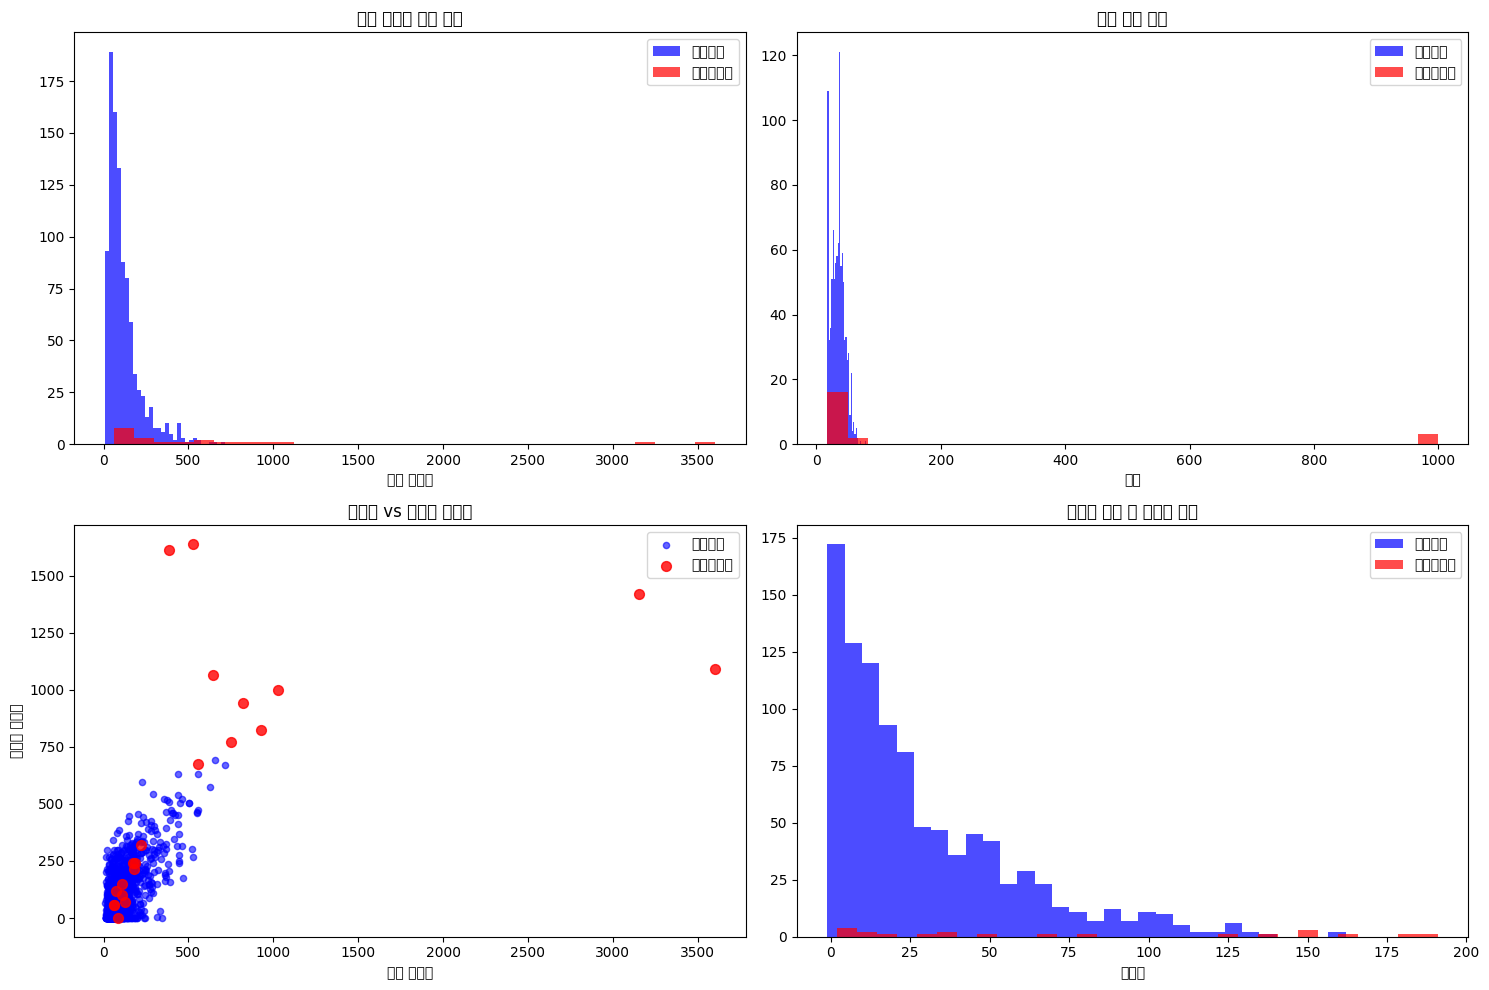

In [65]:
def outlier_interpretation_strategy(df, outliers_mask):
    """이상값 해석 및 처리 전략 수립"""
    
    print("=== 이상값 해석 및 처리 전략 ===")
    
    # 이상값 특성 분석
    normal_customers = df[~outliers_mask]
    outlier_customers = df[outliers_mask]
    
    if len(outlier_customers) == 0:
        print("이상값이 없습니다.")
        return
    
    print("1. 이상값 vs 정상값 비교 분석:")
    
    comparison_vars = ['age', 'total_purchases', 'avg_order_value', 'days_since_last_purchase', 'loyalty_points']
    
    comparison_stats = pd.DataFrame({
        '정상고객_평균': normal_customers[comparison_vars].mean(),
        '이상값고객_평균': outlier_customers[comparison_vars].mean(),
        '정상고객_중위수': normal_customers[comparison_vars].median(),
        '이상값고객_중위수': outlier_customers[comparison_vars].median()
    }).round(2)
    
    comparison_stats['차이배수'] = (comparison_stats['이상값고객_평균'] / comparison_stats['정상고객_평균']).round(2)
    
    display(comparison_stats)
    
    # 2. 이상값 분류 및 처리 전략
    print(f"\n2. 이상값 분류 및 처리 전략:")
    
    # VIP 고객 (높은 구매액 + 높은 충성도)
    vip_mask = (outlier_customers['avg_order_value'] > normal_customers['avg_order_value'].quantile(0.95)) & \
               (outlier_customers['loyalty_points'] > normal_customers['loyalty_points'].quantile(0.95))
    vip_count = vip_mask.sum()
    
    # 데이터 오류 (나이 999살, 음수 날짜 등)
    error_mask = (outlier_customers['age'] > 100) | (outlier_customers['days_since_last_purchase'] < 0)
    error_count = error_mask.sum()
    
    # 이상 행동 고객 (오랫동안 구매 없음)
    dormant_mask = outlier_customers['days_since_last_purchase'] > normal_customers['days_since_last_purchase'].quantile(0.95)
    dormant_count = dormant_mask.sum()
    
    print(f"이상값 분류:")
    print(f"  VIP 고객 (특별 관리 대상): {vip_count}명")
    print(f"  데이터 오류 (수정/제거 필요): {error_count}명") 
    print(f"  휴면 고객 (재활성화 대상): {dormant_count}명")
    print(f"  기타 이상값: {len(outlier_customers) - vip_count - error_count - dormant_count}명")
    
    # 시각화 (소문자 변수명 사용)
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]
    # 구매액 분포 비교
    a1.hist(normal_customers['avg_order_value'], bins=30, alpha=0.7, label='정상고객', color='blue')
    a1.hist(outlier_customers['avg_order_value'], bins=30, alpha=0.7, label='이상값고객', color='red')
    a1.set_title('평균 구매액 분포 비교')
    a1.set_xlabel('평균 구매액')
    a1.legend()
    
    # 나이 분포 비교
    a2.hist(normal_customers['age'], bins=30, alpha=0.7, label='정상고객', color='blue')
    a2.hist(outlier_customers['age'], bins=30, alpha=0.7, label='이상값고객', color='red')
    a2.set_title('나이 분포 비교')
    a2.set_xlabel('나이')
    a2.legend()
    
    # 구매액 vs 충성도 포인트 산점도
    a3.scatter(normal_customers['avg_order_value'], normal_customers['loyalty_points'], 
                     alpha=0.6, label='정상고객', color='blue', s=20)
    a3.scatter(outlier_customers['avg_order_value'], outlier_customers['loyalty_points'], 
                     alpha=0.8, label='이상값고객', color='red', s=50)
    a3.set_xlabel('평균 구매액')
    a3.set_ylabel('충성도 포인트')
    a3.set_title('구매액 vs 충성도 포인트')
    a3.legend()
    
    # 마지막 구매 후 경과일 분포
    a4.hist(normal_customers['days_since_last_purchase'], bins=30, alpha=0.7, label='정상고객', color='blue')
    a4.hist(outlier_customers['days_since_last_purchase'], bins=30, alpha=0.7, label='이상값고객', color='red')
    a4.set_title('마지막 구매 후 경과일 분포')
    a4.set_xlabel('경과일')
    a4.legend()
    
    plt.tight_layout()
    plt.show()

# 이상값 해석 및 전략 수립
outlier_interpretation_strategy(df_mice, final_outliers)








In [77]:
# 이상값 처리 실행
def execute_outlier_treatment(df: pd.DataFrame, outliers_mask):
    print('=== 이상값 처리 실행 ===')
    df_treated = df.copy()
    outliers = df[outliers_mask]

    if len(outliers) == 0:
        print('처리할 이상값 없음.')
        return df_treated
    
    print(f'처리 대상 이상값: {len(outliers)}개')
    # 1. VIP 고객 처리 (별도 세그먼트 분리)
    vip_mask = (outliers['avg_order_value'] > df['avg_order_value'].quantile(0.95)) & \
        (outliers['loyalty_points'] > df['loyalty_points'].quantile(0.95))
    
    # VIP 인덱스 모음
    vip_indices = outliers[vip_mask].index
    # 행=VIP들만 뽑고, 해당 사람들만 컬럼-값 추가. 
    df_treated.loc[vip_indices, 'customer_segment'] = 'VIP'
    print(f'  VIP 고객 분리: {len(vip_indices)}명')

    # 2. 데이터 입력 오류 수정
    error_mask = (outliers['age'] > 100) | (outliers['days_since_last_purchase'] < 0)  # 미리 이상치 체크해놓은 대로 작성
    error_indices = outliers[error_mask].index

    # 2-1. 나이 이상치 -> '결측치' 윈저화? 최대값? 
    age_error_mask = outliers['age'] > 100
    age_error_indices = outliers[age_error_mask].index
    df_treated.loc[age_error_indices, 'age'] = np.nan
    print(f'  나이 오류 -> 결측 처리: {age_error_mask.sum()}건')

    # 2-2. 음수 일수 -> 0으로 변경
    negative_days_mask = outliers['days_since_last_purchase'] < 0
    negative_days_indices = outliers[negative_days_mask].index
    df_treated.loc[negative_days_indices, 'days_since_last_purchase'] = 0
    print(f'  음수 일수 -> 0으로 대체: {negative_days_mask.sum()}건')


    # 3. 극단적 구매액 처리(윈저화 99%)
    extreme_spending_mask = outliers['avg_order_value'] > df_treated['avg_order_value'].quantile(0.99)
    extreme_spending_indices = outliers[extreme_spending_mask].index
    # 윈저화 할 금액 설정
    winsor_threshold = df_treated['avg_order_value'].quantile(0.99)
    df_treated.loc[extreme_spending_indices, 'avg_order_value'] = winsor_threshold
    print(f'  극단적 구매액 Winsorizing: {extreme_spending_mask.sum()}건 - [{winsor_threshold:.2f}]')


    # 4. 휴면 고객 처리 (별도 플래그 생성)
    dormant_threshold = df_treated['days_since_last_purchase'].quantile(0.95)
    dormant_mask = outliers['days_since_last_purchase'] > dormant_threshold
    dormant_indices = outliers[dormant_mask].index
    df_treated.loc[dormant_indices, 'status'] = '휴면고객'
    df_treated['status'] = df_treated['status'].fillna('활동고객')
    print(f'  휴면 고객 플래그 생성: {dormant_mask.sum()}명 - {dormant_threshold:.1f}일 이상')


    # 5. 처리 결과 요약
    print(f'\n처리 결과 요약')
    print(f'   원본 데이터: {len(df)}건')
    print(f'   VIP 세그먼트: {(df_treated.get('customer_segment', '') =='VIP').sum()}명')
    print(f"   휴면 고객: {(df_treated.get('status', '') == '휴면고객').sum()}건")
    print(f"   활성 고객: {(df_treated.get('status', '') == '활동고객').sum()}건")

    # 6. 이상치 처리로 생긴 결측치 처리 (나이오류 채우기)
    if df_treated['age'].isnull().sum() > 0:
        print('\n추가 결측치 처리')
        from sklearn.impute import KNNImputer
        age_imputer = KNNImputer(n_neighbors=5)
        # '비슷함'을 참고할 컬럼들
        cols = ['avg_order_value', 'days_since_last_purchase', 'loyalty_points']
        data = df_treated[['age'] + cols]
        display(data)
        imputed = age_imputer.fit_transform(data)
        df_treated['age'] = imputed[:, 0]
        print(f'   KNN으로 나이 결측값 대체: {age_error_mask.sum()}건')

    return df_treated


execute_outlier_treatment(df_knn, final_outliers)


=== 이상값 처리 실행 ===
처리 대상 이상값: 21개
  VIP 고객 분리: 10명
  나이 오류 -> 결측 처리: 4건
  음수 일수 -> 0으로 대체: 0건
  극단적 구매액 Winsorizing: 7건 - [558.44]
  휴면 고객 플래그 생성: 8명 - 95.0일 이상

처리 결과 요약
   원본 데이터: 1000건
   VIP 세그먼트: 10명
   휴면 고객: 8건
   활성 고객: 992건

추가 결측치 처리


,age,avg_order_value,days_since_last_purchase,loyalty_points
0,40.0,80.62,8.0,86.0
1,33.0,27.69,4.0,0.0
2,42.0,71.05,58.0,0.0
3,53.0,158.62,24.0,318.0
4,32.0,79.10,59.0,228.0
...,...,...,...,...
995,31.0,628.38,20.0,572.0
996,56.0,81.36,19.0,9.0
997,42.0,107.58,93.0,99.0
998,28.0,55.51,17.0,166.0


   KNN으로 나이 결측값 대체: 4건


,age,total_purchases,avg_order_value,days_since_last_purchase,satisfaction_score,loyalty_points,customer_segment,status
0,40.0,9.0,80.62,8.0,3.8,86.0,NaN,활동고객
1,33.0,9.0,27.69,4.0,2.0,0.0,NaN,활동고객
2,42.0,5.0,71.05,58.0,2.5,0.0,NaN,활동고객
3,53.0,11.0,158.62,24.0,1.8,318.0,NaN,활동고객
4,32.0,14.0,79.10,59.0,5.0,228.0,NaN,활동고객
...,...,...,...,...,...,...,...,...
995,31.0,12.0,628.38,20.0,1.8,572.0,NaN,활동고객
996,56.0,8.0,81.36,19.0,1.2,9.0,NaN,활동고객
997,42.0,13.0,107.58,93.0,1.9,99.0,NaN,활동고객
998,28.0,5.0,55.51,17.0,3.3,166.0,NaN,활동고객
